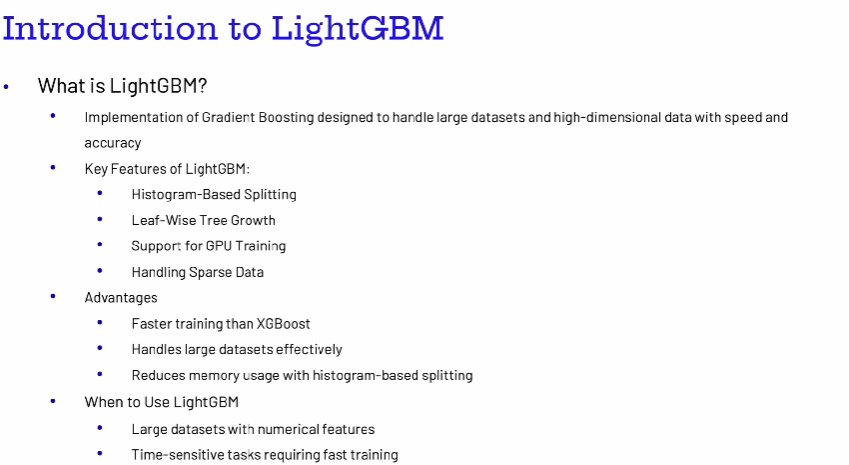
---
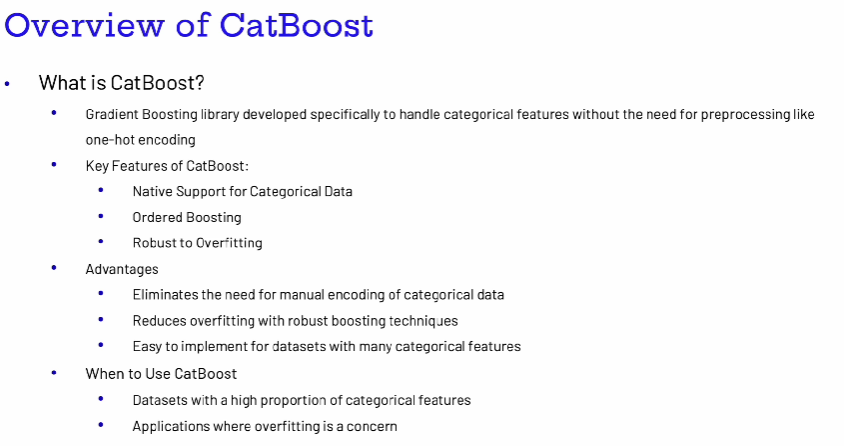
---
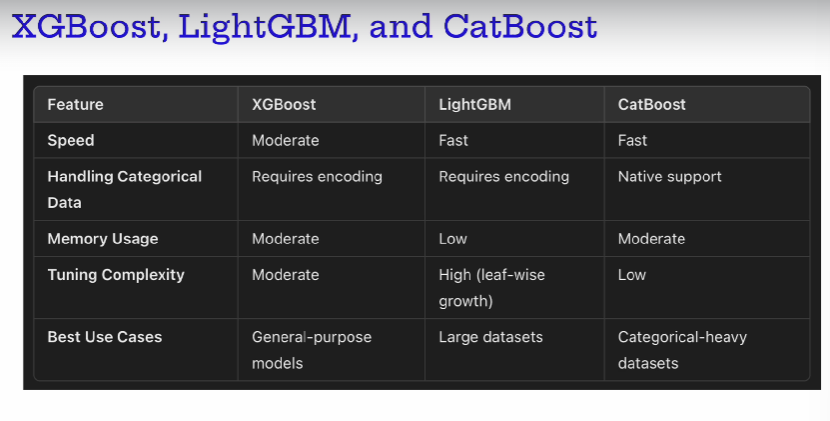

In [7]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
url ="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# select features and target 
feature =['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

In [10]:
# handle missing values 
df.fillna({'Age':df['Age'].median(),'Embarked':df['Embarked'].mode()[0]}, inplace=True)  #

In [11]:
# encoding categorical features 
label_encoders ={}
for col in ['Sex','Embarked']:
    le = LabelEncoder()
    df[col]= le.fit_transform(df[col])
    label_encoders[col] = le


In [12]:
x = df[feature]
y = df[target]
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(712, 5)

In [14]:
x_test.shape

(179, 5)

In [15]:
!pip install lightgbm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import lightgbm as lgb

In [17]:
lgb_model = lgb.LGBMClassifier()

In [18]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [19]:
lgb_pred = lgb_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, lgb_pred)

0.8044692737430168

In [24]:
!pip install catboost
from catboost import CatBoostClassifier

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.1.2-py3-none-any.whl.metadata (11 kB)
Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl (102.4 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)
Using cached narwhals-2.1.2-py3-none-any.whl (392 kB)

   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   -------------------- ------------------- 2/4 [plotly]
   -------------------- ------------------- 2/4 [plotly]
   -------------------- ------------------- 2/4 [plotly]
   -------------------- ------------------- 2/4 [plotly]
   -------------------- ------------------- 2/4 [plotly]
   -------------------- ------------------- 2/4 [p


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
cat_features =['Pclass','Sex', 'Embarked']
cat_model = CatBoostClassifier(  cat_features=cat_features, verbose=0)
cat_model.fit(x_train,y_train)

In [26]:
cat_pred = cat_model.predict(x_test)

In [27]:
accuracy_score(y_test, cat_pred)

0.8156424581005587

In [28]:
from xgboost import XGBClassifier

In [29]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [31]:
xgb_model.fit(x_train,y_train)
xgb_pred = xgb_model.predict(x_test)
accuracy_score(y_test, xgb_pred)

0.770949720670391